In [2]:
#loading the required libraries
import pandas as pd   #for loading data into dataframes format
import numpy as np    #for matrix multiplications during forward and backward propagations

import matplotlib.pyplot as plt #for plotting the error plot
%matplotlib inline       

from sklearn.model_selection import train_test_split #splitting the data into train and test
import math #for divisions
from sklearn.metrics import mean_squared_error 
from math import sqrt 
import os
#print(os.listdir("../input"))


In [4]:
#loading data
data = pd.read_csv("C:\\Users\\DurgaAkhilYeduresi\\myproject\\Robot Automation/nntrainingdata1.csv", header = None)
print(data.head())
data.shape


         0        1       2      3
0  387.199  2997.29  120.92  115.0
1  387.199  2997.29  120.92  115.0
2  387.199  2997.29  120.92  115.0
3  387.199  2997.29  120.92  115.0
4  387.199  2997.29  120.92  115.0


(1690126, 4)

In [5]:
data.columns = ['LDR', 'FDR', 'LSM', 'RSM'] #renaming variables
print(data.head())

       LDR      FDR     LSM    RSM
0  387.199  2997.29  120.92  115.0
1  387.199  2997.29  120.92  115.0
2  387.199  2997.29  120.92  115.0
3  387.199  2997.29  120.92  115.0
4  387.199  2997.29  120.92  115.0


In [6]:
#dropping duplicates
print(data.shape)
udata = data.drop_duplicates() 
print(udata.shape)


(1690126, 4)
(5891, 4)


In [7]:
#removing outliers in data
print(udata.describe())

               LDR          FDR          LSM          RSM
count  5891.000000  5891.000000  5891.000000  5891.000000
mean    626.904443  2085.726035   125.536171   154.034380
std     348.356461   796.678203    21.560707    38.778438
min     219.694000   575.484000    82.327400    74.981600
25%     483.370000  1364.925000   115.000000   118.682500
50%     638.972000  2136.950000   115.000000   145.812000
75%     735.646500  2673.420000   128.554000   187.707500
max    5274.230000  4288.670000   236.409000   300.000000


In [8]:
#removing outliers in data
udata['LDR'][udata['LDR']> 1500] = 1500  
print(udata.describe())

               LDR          FDR          LSM          RSM
count  5891.000000  5891.000000  5891.000000  5891.000000
mean    607.081296  2085.726035   125.536171   154.034380
std     194.946108   796.678203    21.560707    38.778438
min     219.694000   575.484000    82.327400    74.981600
25%     483.370000  1364.925000   115.000000   118.682500
50%     638.972000  2136.950000   115.000000   145.812000
75%     735.646500  2673.420000   128.554000   187.707500
max    1500.000000  4288.670000   236.409000   300.000000


C:\Users\DurgaAkhilYeduresi\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\DurgaAkhilYeduresi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
#normalization
data_min = udata.min()
data_max = udata.max()
normalizeddata = (udata - udata.min()) / (udata.max() - udata.min())
normalizeddata.shape

(5891, 4)

In [10]:
udata.min()


LDR    219.6940
FDR    575.4840
LSM     82.3274
RSM     74.9816
dtype: float64

In [11]:
#spliting data
training , validation = train_test_split(normalizeddata, test_size = 0.3)
testing, validation = train_test_split(validation, test_size=0.5)
print(training.shape)
print(validation.shape)
print(testing.shape)

(4123, 4)
(884, 4)
(884, 4)


In [12]:
#spliting data
x_train_input = np.array(training[['LDR', 'FDR']]).T
y_train_output = np.array(training[['LSM', 'RSM']]).T

x_validation_input = np.array(validation[['LDR', 'FDR']]).T
y_validation_output = np.array(validation[['LSM', 'RSM']]).T

x_testing_input = np.array(testing[['LDR', 'FDR']]).T
y_testing_output = np.array(testing[['LSM', 'RSM']]).T

In [13]:
def calculate_loss(model, x_trainloss, y_trainloss, x_validationloss, y_validationloss):
    #calling model prediction
    Weight_hidden, bias_hidden, Weight_output, bias_output = model['w1'], model['b1'], model['w2'], model['b2']
    z1 = np.dot(Weight_hidden, x_trainloss) +bias_hidden
    a1 = sigmoid(z1)  #activation layer
    
    z2 = np.dot(Weight_output, a1) + bias_output
    a2 = sigmoid(z2) 
    
    rmserror = np.mean(np.square(y_trainloss - a2))
    
    z1 = np.dot(Weight_hidden, x_validationloss) +bias_hidden
    a1 = sigmoid(z1)
    z2 = np.dot(Weight_output, a1) + bias_output
    a2 = sigmoid(z2)
    rmserror_val = np.mean(np.square(y_validationloss - a2))
    return rmserror, rmserror_val

In [14]:
def sigmoid(x):  
    return 1/(1+np.exp(-x *0.1))
def sigmoid_derivative(x):  
    return x*(1-x)

In [15]:
def fwd_propagation(x_fwd_input, model):
    
    Weight_hidden, bias_hidden, Weight_output, bias_output = model['w1'], model['b1'], model['w2'], model['b2']
    
    z1 = np.dot(Weight_hidden, x_fwd_input) +bias_hidden
    a1 = sigmoid(z1)  #activation layer
    z2 = np.dot(Weight_output, a1) + bias_output
    a2 = sigmoid(z2)
    return(a2)         

In [16]:
 def back_propagation(model,x_train_input, a2, error, r_lambda, l_rate, epsilon):
    Weight_hidden, bias_hidden, Weight_output, bias_output, dWeight_hidden_old, dWeight_output_old = model['w1'], model['b1'], model['w2'], model['b2'], model['dw1_old'], model['dw2_old']
    
    delta2 = r_lambda *(error * sigmoid_derivative(a2))
    a1 = sigmoid(np.dot(Weight_hidden, x_train_input) +bias_hidden)  
    delta1 = r_lambda * np.dot(Weight_output.T, delta2)*sigmoid_derivative(a1)
      
    dWeight_output = np.dot(delta2, a1.T)
    dWeight_hidden = np.dot(delta1, x_train_input.T)
    
    dbias_output = np.sum(delta2, axis=1, keepdims=True)
    dbias_hidden = np.sum(delta1, axis=1, keepdims=True)
    
        
    # update the weights with the derivative (slope) of the loss function
    Weight_hidden += l_rate*dWeight_hidden + epsilon * dWeight_hidden_old
    Weight_output += l_rate*dWeight_output + epsilon * dWeight_output_old
    bias_hidden += l_rate*dbias_hidden
    bias_output += l_rate*dbias_output
    # Assign new parameters to the model
    model = { 'w1': Weight_hidden, 'b1': bias_hidden, 'w2': Weight_output, 'b2': bias_output, "dw1_old":dWeight_hidden, "dw2_old": dWeight_output}
    return model

In [17]:
def build_model(x_train_input, y_train_output,n_hidden=4, r_lambda = 0.2, l_rate=0.1,epsilon=0.1,  epochs = 1501):
    
    #initialize parameters to random values
    np.random.seed(144)
    Weight_hidden = np.random.rand(n_hidden,2) 
    bias_hidden = np.zeros((n_hidden,1))
    Weight_output = np.random.rand(2,n_hidden) 
    bias_output = np.zeros((2,1))
    
    #gradient momentum initilizations
    dWeight_hidden_old = np.zeros((n_hidden,2))
    dWeight_output_old = np.zeros((2,n_hidden))
    
    
    #Declaring dictonary for storing parameters for later use
    model = {}
    # Assign new parameters to the model
    model = { 'w1': Weight_hidden, 'b1': bias_hidden, 'w2': Weight_output, 'b2': bias_output, "dw1_old":dWeight_hidden_old, "dw2_old": dWeight_output_old}
    
    training_loss= []
    validation_loss = []
    
    
    for i in range(0, epochs):
        
        
        #forrward propagation
        a2 = fwd_propagation(x_train_input, model)
        error = 2*(y_train_output - a2)
        
        #backward propagation
        model = back_propagation(model,x_train_input, a2, error, r_lambda, l_rate, epsilon)
                
        rmserror,rmserror_val  = calculate_loss(model, x_train_input, y_train_output,x_validation_input,y_validation_output)
        training_loss.append(rmserror)
        validation_loss.append(rmserror_val)
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if i % 300 == 0:
            print("Loss after iteration %i: training loss = %f  cv loss = %f" %(i,rmserror, rmserror_val))
     
    return model, training_loss, validation_loss 

In [18]:
#training_loss

In [19]:
# Build a model
model, training_loss , validation_loss = build_model(x_train_input, y_train_output,n_hidden= 4, epochs = 1501, epsilon=0.1, r_lambda = 0.1, l_rate=0.1)

Loss after iteration 0: training loss = 0.024689  cv loss = 0.022944
Loss after iteration 300: training loss = 0.007684  cv loss = 0.006765
Loss after iteration 600: training loss = 0.005289  cv loss = 0.004882
Loss after iteration 900: training loss = 0.004584  cv loss = 0.004327
Loss after iteration 1200: training loss = 0.004101  cv loss = 0.003928
Loss after iteration 1500: training loss = 0.003779  cv loss = 0.003664


In [20]:
model["w1"]

array([[-28.89058548,   2.36088655],
       [-31.20137949,   0.55531054],
       [ 15.15135364,  77.65946801],
       [-17.61425076,   8.86746416]])

In [21]:
model["w2"]

array([[ 17.80864066,  20.3125712 , -41.4950152 ,   6.77532311],
       [-33.74779092, -35.60011447,  29.4700023 , -18.29744523]])

In [22]:
model["b1"]

array([[ 4.59114608],
       [ 5.26990262],
       [-3.7982716 ],
       [-0.07717027]])

In [23]:
model["b2"]

array([[8.51533099],
       [3.29638089]])

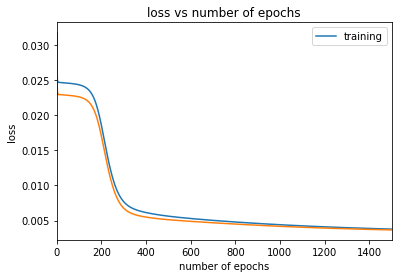

In [24]:
def plot_erros(training_loss):
    plt.plot(training_loss)
    plt.plot(validation_loss)
    plt.xlabel('number of epochs')
    plt.ylabel('loss')
    plt.title('loss vs number of epochs')
    plt.legend(['training'], loc='upper right')
    plt.xlim(0, 1500)
    plt.show()
plot_erros(training_loss)

In [25]:
y_prediction = fwd_propagation(x_testing_input, model)
y_prediction_df = pd.DataFrame(y_prediction.T,columns=['LSM', 'RSM'])
y_prediction_df.head()

,LSM,RSM
0,0.360105,0.309087
1,0.258244,0.252663
2,0.336408,0.168786
3,0.331950,0.340241
4,0.228032,0.416601


In [26]:
#denormalize
y_prediction_df['LSM'] = data_min['LSM'] + y_prediction_df['LSM']*(data_max['LSM'] - data_min['LSM']) 
y_prediction_df['RSM'] = data_min['RSM'] + y_prediction_df['RSM']*(data_max['RSM'] - data_min['RSM']) 
y_prediction_df.head()

,LSM,RSM
0,137.812952,144.531950
1,122.118049,131.835346
2,134.161613,112.961513
3,133.474781,151.542051
4,117.462951,168.724493
